In [1]:
#使用seaborn
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("paper",font_scale=1.5,rc={'figure.dpi':300})
sns.set_style("ticks")   # 风格选择包括："white", "dark", "whitegrid", "darkgrid", "ticks"
sns.set_style({'font.sans-serif': ['SimHei', 'Calibri']})  #设置中文设定
from pandas import Series,DataFrame


import numpy as np
np.random.seed(10000)
import imp
import input_data_class

import os
import configparser
import argparse
import logging
import logging.config

from scipy.stats import entropy
import math
from sklearn.manifold import TSNE
from sklearn import metrics 

In [2]:
#paper imgs dir
paper_imgs_dir="paper_imgs/"

In [3]:
def draw_tsner(data,labels,paper_img_name=""):
    
    color={0:'r',1:'b'}
    
    labels=[ color[i]  for i in labels  ]
 
    x_embedded = TSNE(n_components=2,random_state=0).fit_transform(data)
    plt.figure()
    plt.scatter(x_embedded[:,0],x_embedded[:,1],c=labels, s=1.0, alpha = 0.5)
    
    plt.savefig(paper_img_name,format="pdf",bbox_inches="tight",dpi=600)
    
    plt.show()

    print(metrics.silhouette_score(x_embedded, labels, sample_size=len(data), metric='euclidean'))
    


In [4]:
def Interpretability(dataset="location",TOP=2):

    defense="MemGuard"
    bins=30
    xlim=(0, 1.0)
    ylim=(0, 15.0)
    
    input_data=input_data_class.InputData(dataset=dataset)
    config = configparser.ConfigParser()
    config.read('config.ini')
    user_label_dim=int(config[dataset]["num_classes"])
    result_folder=config[dataset]["result_folder"]
    
    

    
    (x_evaluate,y_evaluate,l_evaluate)=input_data.input_data_attacker_evaluate()
    evaluation_noise_filepath=result_folder+"/attack/MemGuard_noise_data_evaluation.npz"
    print(evaluation_noise_filepath)
    if not os.path.isfile(evaluation_noise_filepath):
        raise FileNotFoundError
    npz_defense=np.load(evaluation_noise_filepath)
    f_evaluate_noise=npz_defense['defense_output']
    f_evaluate_origin=npz_defense['tc_output']

    f_evaluate_noise=np.sort(f_evaluate_noise,axis=1)
    f_evaluate_origin=np.sort(f_evaluate_origin,axis=1)

    
    print("*"*100)
    print("nn attack+no defense")
    data=f_evaluate_origin.copy()
    labels=l_evaluate
    draw_tsner(data,labels,paper_imgs_dir+"v_nn_no.pdf")
    
    print("*"*100)
    print("nn attack+MemGuard defense")
    data=f_evaluate_noise.copy()
    labels=l_evaluate
    draw_tsner(data,labels,paper_imgs_dir+"v_nn_m.pdf")
    
    print("*"*100)
    print("our attack+no defense")
    data=f_evaluate_origin.copy()
    data[:,:-TOP]=0
    labels=l_evaluate
    draw_tsner(data,labels,paper_imgs_dir+"v_our_no.pdf")
    
    print("*"*100)
    print("our attack+MemGuard defense")
    data=f_evaluate_noise.copy()
    data[:,:-TOP]=0
    labels=l_evaluate
    draw_tsner(data,labels,paper_imgs_dir+"v_our_m.pdf")

Attacker evaluate member data range: {'start': '0', 'end': '1000'}
Attacker evaluate nonmember data range: {'start': '2000', 'end': '3000'}
result/location/code_publish//attack/MemGuard_noise_data_evaluation.npz
****************************************************************************************************
nn attack+no defense


/mnt/opt/anaconda2/envs/nips/lib/python2.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


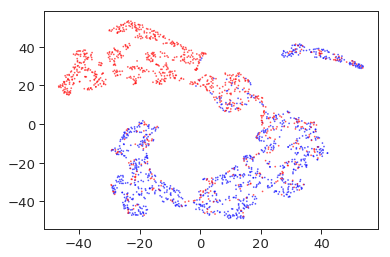

0.22889298
****************************************************************************************************
nn attack+MemGuard defense


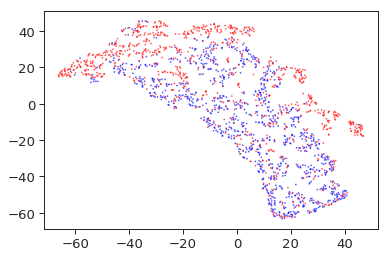

0.08078281
****************************************************************************************************
our attack+no defense


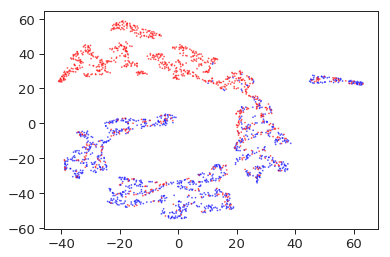

0.23274653
****************************************************************************************************
our attack+MemGuard defense


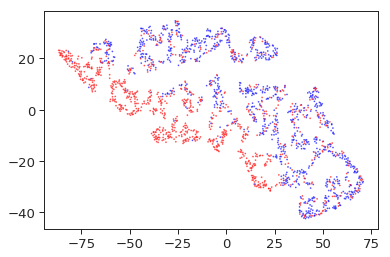

0.0997738


In [5]:
Interpretability(dataset="location",TOP=2)

In [6]:
"""
(x_evaluate,y_evaluate,l_evaluate)=input_data.input_data_attacker_evaluate()
evaluation_noise_filepath=result_folder+"/attack/MemGuard_noise_data_evaluation.npz"
print(evaluation_noise_filepath)
if not os.path.isfile(evaluation_noise_filepath):
    raise FileNotFoundError
npz_defense=np.load(evaluation_noise_filepath)
f_evaluate_noise=npz_defense['defense_output']
f_evaluate_origin=npz_defense['tc_output']

f_evaluate_noise=np.sort(f_evaluate_noise,axis=1)
f_evaluate_origin=np.sort(f_evaluate_origin,axis=1)

for TOP in [1,2,3,5,10,20,30]:
    data=f_evaluate_noise.copy()
    data[:,:-TOP]=0
    x_embedded = TSNE(n_components=2,random_state=0).fit_transform(data)
    
    labels=l_evaluate
    
    print("TOP={} silhouette_score={}".format( TOP, metrics.silhouette_score(x_embedded, labels, sample_size=len(data), metric='euclidean')))   
    """

'\n(x_evaluate,y_evaluate,l_evaluate)=input_data.input_data_attacker_evaluate()\nevaluation_noise_filepath=result_folder+"/attack/MemGuard_noise_data_evaluation.npz"\nprint(evaluation_noise_filepath)\nif not os.path.isfile(evaluation_noise_filepath):\n    raise FileNotFoundError\nnpz_defense=np.load(evaluation_noise_filepath)\nf_evaluate_noise=npz_defense[\'defense_output\']\nf_evaluate_origin=npz_defense[\'tc_output\']\n\nf_evaluate_noise=np.sort(f_evaluate_noise,axis=1)\nf_evaluate_origin=np.sort(f_evaluate_origin,axis=1)\n\nfor TOP in [1,2,3,5,10,20,30]:\n    data=f_evaluate_noise.copy()\n    data[:,:-TOP]=0\n    x_embedded = TSNE(n_components=2,random_state=0).fit_transform(data)\n    \n    labels=l_evaluate\n    \n    print("TOP={} silhouette_score={}".format( TOP, metrics.silhouette_score(x_embedded, labels, sample_size=len(data), metric=\'euclidean\')))   \n    '

The gap between the two curves in a graph corresponds to the information leakage of the target classifier’s training dataset. Our defense substantially reduces such gaps. 